In [14]:
import mujoco
import os
import mediapy as media

In [ ]:
xml_path = os.path.join("assets", "mujoco_menagerie-main", "franka_emika_panda", "mjx_panda.xml")
model = mujoco.MjModel.from_xml_path(xml_path)
data = mujoco.MjData(model)

""

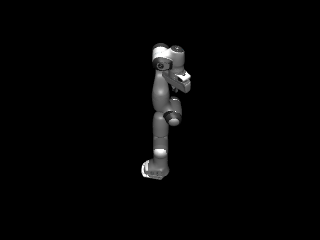

In [16]:
with mujoco.Renderer(model) as renderer:
  mujoco.mj_forward(model, data)
  renderer.update_scene(data)

  media.show_image(renderer.render())

In [17]:
duration = 5  # (seconds)
framerate = 40  # (Hz)

# Simulate and display video.
frames = []
mujoco.mj_resetData(model, data)  # Reset state and time.
with mujoco.Renderer(model) as renderer:
  while data.time < duration:
    mujoco.mj_step(model, data)
    if len(frames) < data.time * framerate:
      renderer.update_scene(data)
      pixels = renderer.render()
      frames.append(pixels)

media.show_video(frames, fps=framerate)